<a href="https://colab.research.google.com/github/Xhydracore/Rock-Paper-Scissors-Tensorflow/blob/master/Rock_Paper_Scissors_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1xnjGri62m0cBXAj6cTT5WZfQHmTG2FKw">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Xhydracore/Rock-Paper-Scissors-Tensorflow/blob/master/Rock_Paper_Scissors_Tensorflow.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>

In [2]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2020-05-03 16:38:43--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  11.9MB/s    in 39s     

2020-05-03 16:39:23 (7.89 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# melakukan ekstraksi pada file zip
import zipfile,os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
rock_dir = os.path.join('/tmp/rockpaperscissors/rock')
paper_dir = os.path.join('/tmp/rockpaperscissors/paper')
scissors_dir = os.path.join('/tmp/rockpaperscissors/scissors')

In [5]:
print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 726
total training paper images: 712
total training scissors images: 750
['xH9uXlr7ev4rhwf2.png', 'E4kPnJ376NIwG4Mh.png', '2O9XPBJRT119drWX.png', 'd9UIt2WF1O9DYHPA.png', 'E5mlbTDFPHA7QX9U.png', 'DFi1cIxsQrXxIoWn.png', '2NmrcDGkc7FQuu12.png', 'Gyq9GJFTfF1vvOZ8.png', 'nrRw9O00nT1ZeOJh.png', '51TTZXCnAuk3Ck6s.png']
['6NzgMmSELzk3WtZh.png', 'EVtIRpfQ2ys2A3ag.png', 'wdUfwC8IoQbVtqzR.png', 'RFXW2X1DlH7xboth.png', 'W79peyAyfQqNP1vF.png', '0cb6cVL8pkfi4wF6.png', 'oAvUHooYsSpFid0p.png', 'Dvamqz9JlSMySW1i.png', 'AYfr1pZxmZyZaXWu.png', '7PSJU8kbZf8S6FRW.png']
['RbjC5b9sd5JtTlOf.png', 'dWIQvO3tVSLw4etp.png', 'IdrewaHdlHRrNHbJ.png', 'vMAludIRGF14FuGn.png', 'DJQMlkIuVBNMoXMX.png', 'RtsIA3p963IFGi8t.png', 'wjpTy95PqKpcRg9o.png', 'i0pYFjwidPeBL3je.png', 'mrWRR4bVPDvIIg7D.png', 'hzfrafUqDDoL0esu.png']


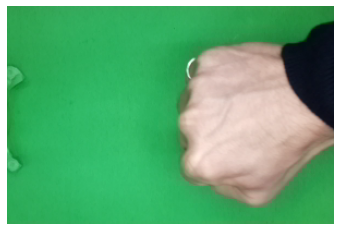

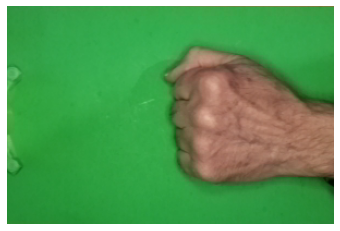

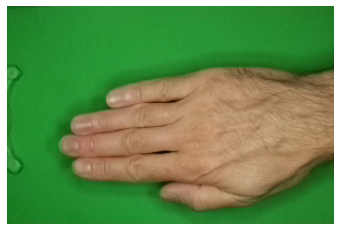

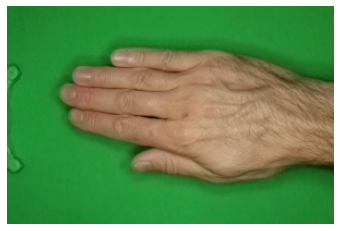

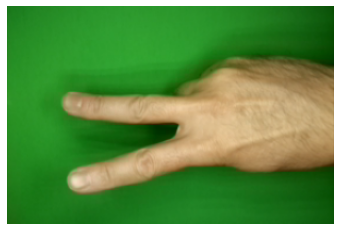

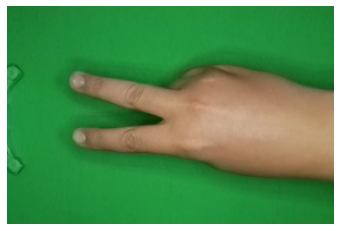

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [16]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
print(tf.__version__)

2.2.0-rc3


In [38]:
data_dir = '/tmp/rockpaperscissors/rps-cv-images/'
augs_gen = ImageDataGenerator(
    rescale=1./255,        
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    rotation_range=40,
    fill_mode='nearest',
    validation_split = 0.2
)  

train_generator = augs_gen.flow_from_directory(
    data_dir,
    target_size = (150,150),
    batch_size=16,
    class_mode = 'categorical',
    shuffle=True,
)

validation_generator = augs_gen.flow_from_directory(
    data_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical',
    shuffle=False,
    subset = 'validation'
)

Found 2188 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [39]:
from keras import layers
from keras import models
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)      

In [40]:
model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001, rho=0.9), metrics=['accuracy'])
history = model.fit(train_generator,
                    steps_per_epoch=60,
                    epochs=25,
                    validation_data = validation_generator,
                    validation_steps = 5,
                    verbose=1)
model.save("rps.h5")

Epoch 1/25
60/60 [==============================] - 70s 1s/step - loss: 1.1740 - accuracy: 0.3688 - val_loss: 1.1185 - val_accuracy: 0.1125
Epoch 2/25
60/60 [==============================] - 66s 1s/step - loss: 0.9490 - accuracy: 0.5698 - val_loss: 0.6268 - val_accuracy: 0.7375
Epoch 3/25
60/60 [==============================] - 65s 1s/step - loss: 0.6071 - accuracy: 0.7458 - val_loss: 0.2541 - val_accuracy: 0.9500
Epoch 4/25
60/60 [==============================] - 66s 1s/step - loss: 0.4947 - accuracy: 0.8167 - val_loss: 0.2114 - val_accuracy: 0.9250
Epoch 5/25
60/60 [==============================] - 65s 1s/step - loss: 0.4401 - accuracy: 0.8410 - val_loss: 0.4733 - val_accuracy: 0.7826
Epoch 6/25
60/60 [==============================] - 66s 1s/step - loss: 0.3295 - accuracy: 0.8792 - val_loss: 0.2177 - val_accuracy: 0.9125
Epoch 7/25
60/60 [==============================] - 65s 1s/step - loss: 0.3074 - accuracy: 0.8944 - val_loss: 0.6548 - val_accuracy: 0.7500
Epoch 8/25
60/60 [==

In [41]:
model.metrics_names

['loss', 'accuracy']

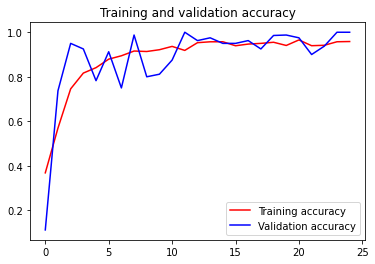

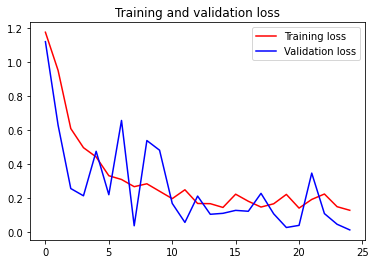

<Figure size 432x288 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [43]:
from glob import glob

n = [i[23:31].upper() for i in sorted(glob('/tmp/rockpaperscissors/*'))]
n.remove('RPS-CV-I')
n.remove('README_R')
print(n)

['PAPER', 'ROCK', 'SCISSORS']


Saving paper1.png to paper1 (4).png
Saving paper2.png to paper2 (3).png
Saving paper3.png to paper3 (3).png
Saving rock.png to rock (1).png
Saving rock1.png to rock1 (4).png
Saving rock2.png to rock2 (3).png
Saving scissors1.png to scissors1 (3).png
Saving scissors2.png.png to scissors2.png (3).png
Saving scissors3.png to scissors3 (3).png
paper1.png
[[1. 0. 0.]]
PAPER
paper2.png
[[1. 0. 0.]]
PAPER
paper3.png
[[1. 0. 0.]]
PAPER
rock.png
[[1.2896418e-14 1.0000000e+00 0.0000000e+00]]
ROCK
rock1.png
[[0. 1. 0.]]
ROCK
rock2.png
[[0. 1. 0.]]
ROCK
scissors1.png
[[0. 0. 1.]]
SCISSORS
scissors2.png.png
[[0. 0. 1.]]
SCISSORS
scissors3.png
[[0. 0. 1.]]
SCISSORS


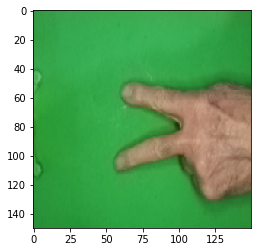

In [60]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  print(n[np.argmax(classes)])